# Set up example code

## Model setup

In [1]:
import subprocess

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process import kernels
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from scipy.linalg import lapack
from scipy import stats
import emcee
import numpy as np

import os
import pickle
from pathlib import Path

import src.reader as Reader

## Step 1: prepare input pickle file

### Load stuff from text files

In [2]:
# Read data files
RawData1   = Reader.ReadData('input/Calibration/Data_TEST_PbPb5020_RAACharged_0to5_2015.dat')
RawData2   = Reader.ReadData('input/Calibration/Data_TEST2_PbPb5020_RAACharged_0to5_2015.dat')
RawData3   = Reader.ReadData('input/Calibration/Data_TEST3_PbPb5020_RAACharged_0to5_2015.dat')
RawData4   = Reader.ReadData('input/Calibration/Data_TEST4_PbPb5020_RAACharged_0to5_2015.dat')
RawData5a  = Reader.ReadData('input/Calibration/Data_TEST5_PbPb5020_RAACharged_0to5_2015.dat')
RawData5b  = Reader.ReadData('input/Calibration/Data_TEST5_PbPb5020_RAACharged_30to40_2015.dat')
RawData7a  = Reader.ReadData('input/Calibration/Data_TEST7_AuAu200_RAACharged_0to5_2013.dat')
RawData7b  = Reader.ReadData('input/Calibration/Data_TEST7_AuAu200_RAACharged_30to50_2013.dat')
RawData7c  = Reader.ReadData('input/Calibration/Data_TEST7_PbPb2760_RAACharged_0to5_2014.dat')
RawData7d  = Reader.ReadData('input/Calibration/Data_TEST7_PbPb2760_RAACharged_40to50_2014.dat')
RawData7e  = Reader.ReadData('input/Calibration/Data_TEST7_PbPb5020_RAACharged_0to5_2015.dat')
RawData7f  = Reader.ReadData('input/Calibration/Data_TEST7_PbPb5020_RAACharged_30to40_2015.dat')

# Read design points
RawDesign1   = Reader.ReadDesign('input/Calibration/DesignTEST.dat')
RawDesign2   = Reader.ReadDesign('input/Calibration/DesignTEST2.dat')
RawDesign3   = Reader.ReadDesign('input/Calibration/DesignTEST3.dat')
RawDesign4   = Reader.ReadDesign('input/Calibration/DesignTEST4.dat')
RawDesign5   = Reader.ReadDesign('input/Calibration/DesignTEST5.dat')
RawDesign7   = Reader.ReadDesign('input/Calibration/DesignTEST7.dat')

# Read model prediction
RawPrediction1   = Reader.ReadPrediction('input/Calibration/Prediction_TEST_PbPb5020_RAACharged_0to5_2015.dat')
RawPrediction2   = Reader.ReadPrediction('input/Calibration/Prediction_TEST2_PbPb5020_RAACharged_0to5_2015.dat')
RawPrediction3   = Reader.ReadPrediction('input/Calibration/Prediction_TEST3_PbPb5020_RAACharged_0to5_2015.dat')
RawPrediction4   = Reader.ReadPrediction('input/Calibration/Prediction_TEST4_PbPb5020_RAACharged_0to5_2015.dat')
RawPrediction5a  = Reader.ReadPrediction('input/Calibration/Prediction_TEST5_PbPb5020_RAACharged_0to5_2015.dat')
RawPrediction5b  = Reader.ReadPrediction('input/Calibration/Prediction_TEST5_PbPb5020_RAACharged_30to40_2015.dat')
RawPrediction7a  = Reader.ReadPrediction('input/Calibration/Prediction_TEST7_AuAu200_RAACharged_0to5_2013.dat')
RawPrediction7b  = Reader.ReadPrediction('input/Calibration/Prediction_TEST7_AuAu200_RAACharged_30to50_2013.dat')
RawPrediction7c  = Reader.ReadPrediction('input/Calibration/Prediction_TEST7_PbPb2760_RAACharged_0to5_2014.dat')
RawPrediction7d  = Reader.ReadPrediction('input/Calibration/Prediction_TEST7_PbPb2760_RAACharged_40to50_2014.dat')
RawPrediction7e  = Reader.ReadPrediction('input/Calibration/Prediction_TEST7_PbPb5020_RAACharged_0to5_2015.dat')
RawPrediction7f  = Reader.ReadPrediction('input/Calibration/Prediction_TEST7_PbPb5020_RAACharged_30to40_2015.dat')

### Run this block for Test 1

In [ ]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["PbPb5020"]
AllData["keys"] = RawDesign1["Parameter"]
AllData["labels"] = RawDesign1["Parameter"]
AllData["ranges"] = [(0, 2), (0, 2)]
AllData["observables"] = [('R_AA', ['C0'])]

# Data points
Data = {"PbPb5020": {"R_AA": {"C0": RawData1["Data"]}}}

# Model predictions
Prediction = {"PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction1["Prediction"], "x": RawData1["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData1, RawData1, SysLength = {"default": 0.2})

# Assign data to the dictionary
AllData["design"] = RawDesign1["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Run this block for Test 2

In [ ]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["PbPb5020"]
AllData["keys"] = RawDesign2["Parameter"]
AllData["labels"] = RawDesign2["Parameter"]
AllData["ranges"] = [(0, 2), (0, 2)]
AllData["observables"] = [('R_AA', ['C0'])]

# Data points
Data = {"PbPb5020": {"R_AA": {"C0": RawData2["Data"]}}}

# Model predictions
Prediction = {"PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction2["Prediction"], "x": RawData2["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData2, RawData2, SysLength = {"default": 0.2})

# Assign data to the dictionary
AllData["design"] = RawDesign2["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Run this block for Test 3

In [ ]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["PbPb5020"]
AllData["keys"] = RawDesign3["Parameter"]
AllData["labels"] = RawDesign3["Parameter"]
AllData["ranges"] = [(0, 2), (0, 2)]
AllData["observables"] = [('R_AA', ['C0'])]

# Data points
Data = {"PbPb5020": {"R_AA": {"C0": RawData3["Data"]}}}

# Model predictions
Prediction = {"PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction3["Prediction"], "x": RawData3["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData3, RawData3, SysLength = {"default": 10000})

# Assign data to the dictionary
AllData["design"] = RawDesign3["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
AllData["cov"]

### Run this block for Test 4

In [ ]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["PbPb5020"]
AllData["keys"] = RawDesign4["Parameter"]
AllData["labels"] = RawDesign4["Parameter"]
AllData["ranges"] = [(0, 2), (0, 2)]
AllData["observables"] = [('R_AA', ['C0'])]

# Data points
Data = {"PbPb5020": {"R_AA": {"C0": RawData4["Data"]}}}

# Model predictions
Prediction = {"PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction4["Prediction"], "x": RawData4["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData4, RawData4, SysLength = {"default": 10000})

# Assign data to the dictionary
AllData["design"] = RawDesign4["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Run this block for Test 5

In [ ]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["PbPb5020"]
AllData["keys"] = RawDesign5["Parameter"]
AllData["labels"] = RawDesign5["Parameter"]
AllData["ranges"] = [(0, 2), (0, 2)]
AllData["observables"] = [('R_AA', ['C0', 'C1'])]

# Data points
Data = {"PbPb5020": {"R_AA": {"C0": RawData5a["Data"], "C1": RawData5b["Data"]}}}

# Model predictions
Prediction = {"PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction5a["Prediction"], "x": RawData5a["Data"]['x']},
                                   "C1": {"Y": RawPrediction5b["Prediction"], "x": RawData5b["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData5a, RawData5a, SysLength = {"default": 10000})
Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData5b, RawData5b, SysLength = {"default": 10000})

# Assign data to the dictionary
AllData["design"] = RawDesign5["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Run this block for Test 6

In [ ]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["PbPb5020"]
AllData["keys"] = RawDesign5["Parameter"]
AllData["labels"] = RawDesign5["Parameter"]
AllData["ranges"] = [(0, 2), (0, 2)]
AllData["observables"] = [('R_AA', ['C0', 'C1'])]

# Data points
Data = {"PbPb5020": {"R_AA": {"C0": RawData5a["Data"], "C1": RawData5b["Data"]}}}

# Model predictions
Prediction = {"PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction5a["Prediction"], "x": RawData5a["Data"]['x']},
                                   "C1": {"Y": RawPrediction5b["Prediction"], "x": RawData5b["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData5a, RawData5a, SysLength = {"default": 10000})
Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData5b, RawData5b, SysLength = {"default": 10000})
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData5a, RawData5b, SysLength = {"default": 10000})
Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData5b, RawData5a, SysLength = {"default": 10000})

# Assign data to the dictionary
AllData["design"] = RawDesign5["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Run this block for Test 7

In [ ]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["AuAu200", "PbPb2760", "PbPb5020"]
AllData["keys"] = RawDesign7["Parameter"]
AllData["labels"] = RawDesign7["Parameter"]
AllData["ranges"] = [(0, 2), (0, 2)]
AllData["observables"] = [('R_AA', ['C0', 'C1'])]

# Data points
Data = {"AuAu200":  {"R_AA": {"C0": RawData7a["Data"], "C1": RawData7b["Data"]}},
        "PbPb2760": {"R_AA": {"C0": RawData7c["Data"], "C1": RawData7d["Data"]}},
        "PbPb5020": {"R_AA": {"C0": RawData7e["Data"], "C1": RawData7f["Data"]}}}

# Model predictions
Prediction = {"AuAu200":  {"R_AA": {"C0": {"Y": RawPrediction7a["Prediction"], "x": RawData7a["Data"]['x']},
                                    "C1": {"Y": RawPrediction7b["Prediction"], "x": RawData7b["Data"]['x']}}},
              "PbPb2760": {"R_AA": {"C0": {"Y": RawPrediction7c["Prediction"], "x": RawData7c["Data"]['x']},
                                    "C1": {"Y": RawPrediction7d["Prediction"], "x": RawData7d["Data"]['x']}}},
              "PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction7e["Prediction"], "x": RawData7e["Data"]['x']},
                                    "C1": {"Y": RawPrediction7f["Prediction"], "x": RawData7f["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")]  = Reader.EstimateCovariance(RawData7a, RawData7a, SysLength = {"default": 10000})
Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C1")]  = Reader.EstimateCovariance(RawData7b, RawData7b, SysLength = {"default": 10000})
Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData7c, RawData7c, SysLength = {"default": 10000})
Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData7d, RawData7d, SysLength = {"default": 10000})
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData7e, RawData7e, SysLength = {"default": 10000})
Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData7f, RawData7f, SysLength = {"default": 10000})


# Assign data to the dictionary
AllData["design"] = RawDesign7["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Run this block for Test 8 & 9

In [3]:
# Initialize empty dictionary
AllData = {}

# Basic information
AllData["systems"] = ["AuAu200", "PbPb2760", "PbPb5020"]
AllData["keys"] = RawDesign7["Parameter"]
AllData["labels"] = RawDesign7["Parameter"]
AllData["ranges"] = [(0, 2), (0, 2)]
AllData["observables"] = [('R_AA', ['C0', 'C1'])]

# Data points
Data = {"AuAu200":  {"R_AA": {"C0": RawData7a["Data"], "C1": RawData7b["Data"]}},
        "PbPb2760": {"R_AA": {"C0": RawData7c["Data"], "C1": RawData7d["Data"]}},
        "PbPb5020": {"R_AA": {"C0": RawData7e["Data"], "C1": RawData7f["Data"]}}}

# Model predictions
Prediction = {"AuAu200":  {"R_AA": {"C0": {"Y": RawPrediction7a["Prediction"], "x": RawData7a["Data"]['x']},
                                    "C1": {"Y": RawPrediction7b["Prediction"], "x": RawData7b["Data"]['x']}}},
              "PbPb2760": {"R_AA": {"C0": {"Y": RawPrediction7c["Prediction"], "x": RawData7c["Data"]['x']},
                                    "C1": {"Y": RawPrediction7d["Prediction"], "x": RawData7d["Data"]['x']}}},
              "PbPb5020": {"R_AA": {"C0": {"Y": RawPrediction7e["Prediction"], "x": RawData7e["Data"]['x']},
                                    "C1": {"Y": RawPrediction7f["Prediction"], "x": RawData7f["Data"]['x']}}}}

# Covariance matrices - the indices are [system][measurement1][measurement2], each one is a block of matrix
Covariance = Reader.InitializeCovariance(Data)
Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C0")]  = Reader.EstimateCovariance(RawData7a, RawData7a, SysLength = {"default": 10000})
Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C1")]  = Reader.EstimateCovariance(RawData7b, RawData7b, SysLength = {"default": 10000})
Covariance["AuAu200"][("R_AA", "C0")][("R_AA", "C1")]  = Reader.EstimateCovariance(RawData7a, RawData7b, SysLength = {"default": 10000})
Covariance["AuAu200"][("R_AA", "C1")][("R_AA", "C0")]  = Reader.EstimateCovariance(RawData7b, RawData7a, SysLength = {"default": 10000})
Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData7c, RawData7c, SysLength = {"default": 10000})
Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData7d, RawData7d, SysLength = {"default": 10000})
Covariance["PbPb2760"][("R_AA", "C0")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData7c, RawData7d, SysLength = {"default": 10000})
Covariance["PbPb2760"][("R_AA", "C1")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData7d, RawData7c, SysLength = {"default": 10000})
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData7e, RawData7e, SysLength = {"default": 10000})
Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData7f, RawData7f, SysLength = {"default": 10000})
Covariance["PbPb5020"][("R_AA", "C0")][("R_AA", "C1")] = Reader.EstimateCovariance(RawData7e, RawData7f, SysLength = {"default": 10000})
Covariance["PbPb5020"][("R_AA", "C1")][("R_AA", "C0")] = Reader.EstimateCovariance(RawData7f, RawData7e, SysLength = {"default": 10000})


# Assign data to the dictionary
AllData["design"] = RawDesign7["Design"]
AllData["model"] = Prediction
AllData["data"] = Data
AllData["cov"] = Covariance

# Save to the desired pickle file
with open('input/default.p', 'wb') as handle:
    pickle.dump(AllData, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Optional: clean past files

In [4]:
# Clean past MCMC samples
if os.path.exists('cache/mcmc_chain.hdf'):
    os.remove("cache/mcmc_chain.hdf")

# Clean past emulator
for system in AllData["systems"]:
    if os.path.exists('cache/emulator/' + system + ".pkl"):
        os.remove('cache/emulator/' + system + ".pkl")

## Step 2: run emulator

In [5]:
! python3 -m src.emulator --retrain --npc 1

[INFO][emulator] training emulator for system AuAu200 (2 PC, 0 restarts)
[2 2]
[INFO][emulator] writing cache file cache/emulator/AuAu200.pkl
AuAu200
2 PCs explain 1.00000 of variance
GP 0: 1.00000 of variance, LML = 40.166, kernel: 1.94**2 * Matern(length_scale=[7.81, 20], nu=1.5)
GP 1: 0.00000 of variance, LML = -31.569, kernel: 1.18**2 * Matern(length_scale=[0.2, 0.2], nu=1.5)
[INFO][emulator] training emulator for system PbPb2760 (2 PC, 0 restarts)
[2 2]
[INFO][emulator] writing cache file cache/emulator/PbPb2760.pkl
PbPb2760
2 PCs explain 1.00000 of variance
GP 0: 1.00000 of variance, LML = 40.166, kernel: 1.94**2 * Matern(length_scale=[7.81, 20], nu=1.5)
GP 1: 0.00000 of variance, LML = -31.569, kernel: 1.18**2 * Matern(length_scale=[0.2, 0.2], nu=1.5)
[INFO][emulator] training emulator for system PbPb5020 (2 PC, 0 restarts)
[2 2]
[INFO][emulator] writing cache file cache/emulator/PbPb5020.pkl
PbPb5020
2 PCs explain 1.00000 of variance
GP 0: 1.00000 of variance, LML = 40.166, ker

In [6]:
from src import lazydict, emulator
EmulatorAuAu200 = emulator.Emulator.from_cache('AuAu200')
EmulatorPbPb2760 = emulator.Emulator.from_cache('PbPb2760')
EmulatorPbPb5020 = emulator.Emulator.from_cache('PbPb5020')

## Step 3: MCMC sampling

In [7]:
if os.path.exists('cache/mcmc_chain.hdf'):
    os.remove("cache/mcmc_chain.hdf")
! python3 -m src.mcmc --nwalkers 500 --nburnsteps 1000 1000

[INFO][mcmc] no existing chain found, starting initial burn-in
[INFO][mcmc] running 500 walkers for 500 steps
[INFO][mcmc] step 50: acceptance fraction: mean 0.6216, std 0.0873, min 0.2400, max 0.8600
[INFO][mcmc] step 100: acceptance fraction: mean 0.6499, std 0.0623, min 0.4300, max 0.8100
[INFO][mcmc] step 150: acceptance fraction: mean 0.6587, std 0.0495, min 0.4800, max 0.7867
[INFO][mcmc] step 200: acceptance fraction: mean 0.6627, std 0.0437, min 0.5000, max 0.7900
[INFO][mcmc] step 250: acceptance fraction: mean 0.6666, std 0.0394, min 0.5560, max 0.7680
[INFO][mcmc] step 300: acceptance fraction: mean 0.6675, std 0.0366, min 0.5600, max 0.7767
[INFO][mcmc] step 350: acceptance fraction: mean 0.6683, std 0.0341, min 0.5600, max 0.7857
[INFO][mcmc] step 400: acceptance fraction: mean 0.6703, std 0.0319, min 0.5800, max 0.7875
[INFO][mcmc] step 450: acceptance fraction: mean 0.6701, std 0.0303, min 0.5778, max 0.7889
[INFO][mcmc] step 500: acceptance fraction: mean 0.6711, std 0.

## Step 4: Analyze posterior samples

In [8]:
from src import mcmc
chain = mcmc.Chain()
MCMCSamples = chain.load()

In [ ]:
MCMCSamples

In [ ]:
TransformedSamples = np.copy(MCMCSamples)
TransformedSamples[:,0] = MCMCSamples[:,0] * MCMCSamples[:,1]
TransformedSamples[:,1] = MCMCSamples[:,0] - MCMCSamples[:,0] * MCMCSamples[:,1]
TransformedSamples[:,2] = MCMCSamples[:,2]
TransformedSamples[:,3] = MCMCSamples[:,3]
# TransformedSamples[:,4] = MCMCSamples[:,4]

In [ ]:
! python3 -m src.plots posterior gp diag_emu

## Step 5: adding all sorts of plots

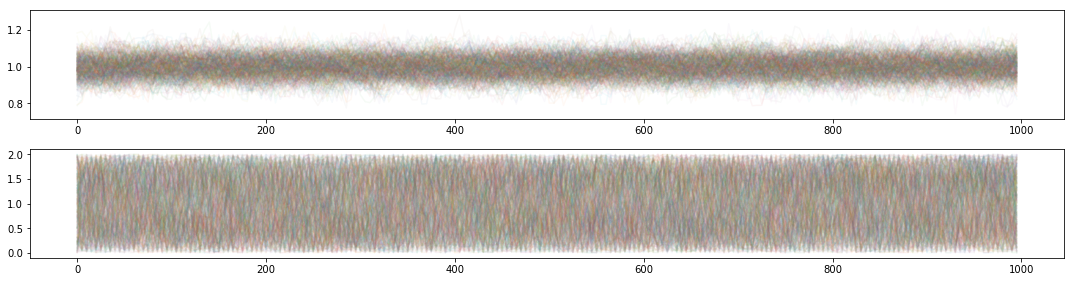

In [9]:
with chain.dataset() as d:
    W = d.shape[0]     # number of walkers
    S = d.shape[1]     # number of steps
    N = d.shape[2]     # number of paramters
    T = int(S / 200)   # "thinning"
    A = 20 / W
    figure, axes = plt.subplots(figsize = (15, 2 * N), ncols = 1, nrows = N)
    for i, ax in enumerate(axes):
        for j in range(0, W):
            ax.plot(range(0, S, T), d[j, ::T, i], alpha = A)
    plt.tight_layout(True)
    plt.savefig('plots/MCMCSamples.pdf', dpi = 192)

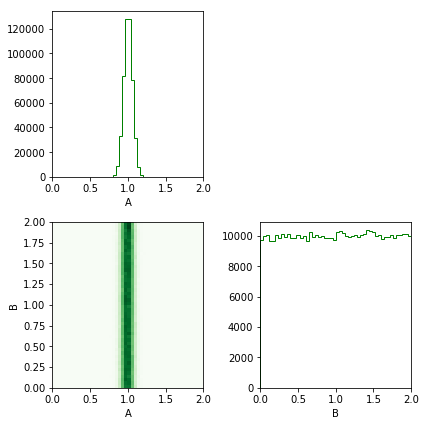

In [10]:
NDimension = len(AllData["labels"])
Ranges = np.array(AllData["ranges"]).T
figure, axes = plt.subplots(figsize = (3 * NDimension, 3 * NDimension), ncols = NDimension, nrows = NDimension)
Names = AllData["labels"]
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        if i==j:
            ax.hist(MCMCSamples[:,i], bins=50,
                    range=Ranges[:,i], histtype='step', color='green')
            ax.set_xlabel(Names[i])
            ax.set_xlim(*Ranges[:,j])
        if i>j:
            ax.hist2d(MCMCSamples[:, j], MCMCSamples[:, i], 
                      bins=50, range=[Ranges[:,j], Ranges[:,i]], 
                      cmap='Greens')
            ax.set_xlabel(Names[j])
            ax.set_ylabel(Names[i])
            ax.set_xlim(*Ranges[:,j])
            ax.set_ylim(*Ranges[:,i])
        if i<j:
            ax.axis('off')
plt.tight_layout(True)
plt.savefig('plots/Correlation.pdf', dpi = 192)
# figure

In [ ]:
NDimension = len(AllData["labels"])
Ranges = np.array(AllData["ranges"]).T
figure, axes = plt.subplots(figsize = (15, 15), ncols = NDimension, nrows = NDimension)
Names = [r"$A$", r"$C$", r"$B$", r"$D$", r"$Q$", r"$P_6$"]
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        if i==j:
            ax.hist(TransformedSamples[:,i], bins=50,
                    range=Ranges[:,i], histtype='step')
            ax.set_xlabel(Names[i])
            ax.set_xlim(*Ranges[:,j])
        if i>j:
            ax.hist2d(TransformedSamples[:, j], TransformedSamples[:, i], 
                      bins=50, range=[Ranges[:,j], Ranges[:,i]], 
                      cmap='Blues')
            ax.set_xlabel(Names[j])
            ax.set_ylabel(Names[i])
            ax.set_xlim(*Ranges[:,j])
            ax.set_ylim(*Ranges[:,i])
        if i<j:
            ax.axis('off')
plt.tight_layout(True)
plt.savefig('plots/TransformedCorrelation.pdf', dpi = 192)
# figure

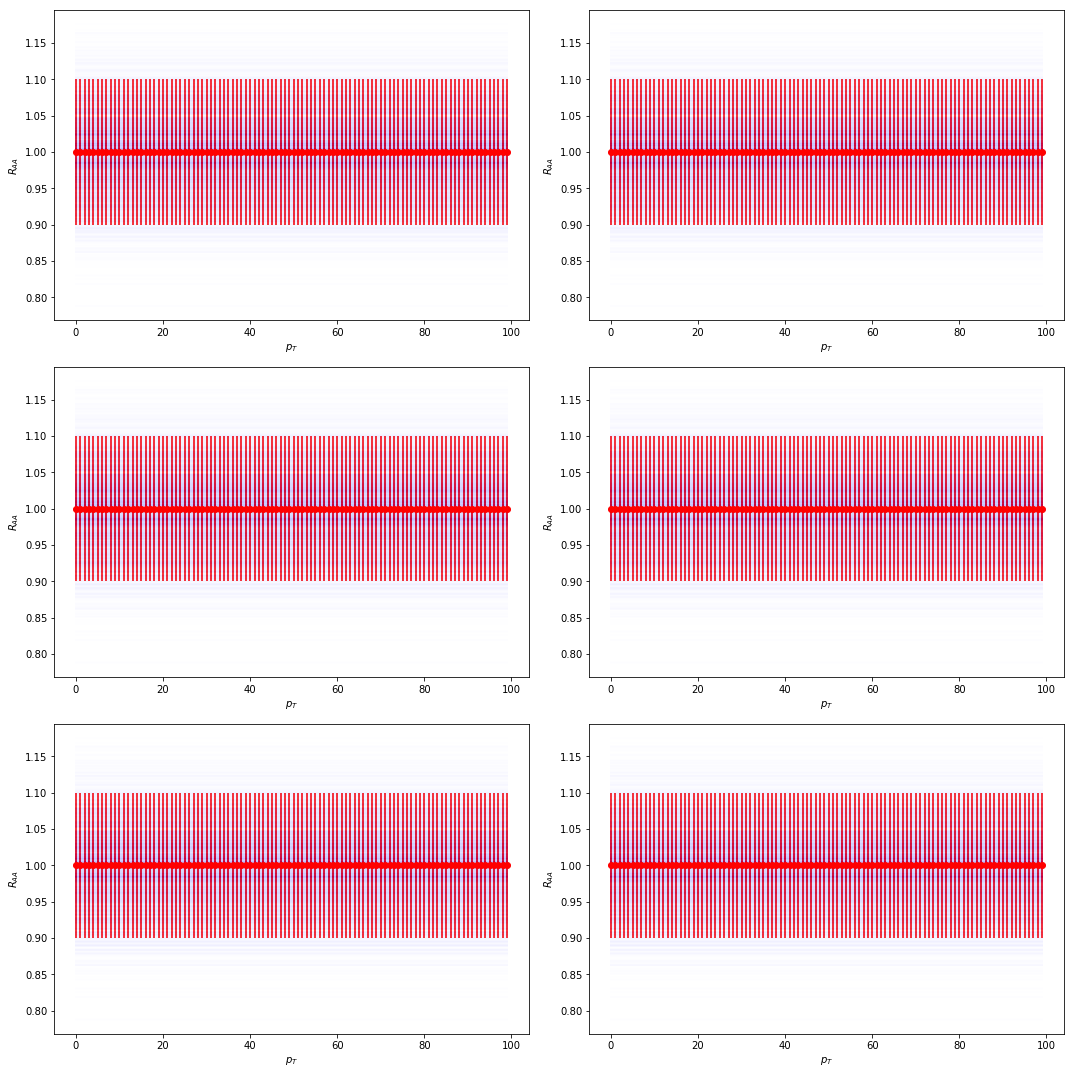

In [11]:
Examples = MCMCSamples[ np.random.choice(range(len(MCMCSamples)), 2500), :]

TempPrediction = {"AuAu200": EmulatorAuAu200.predict(Examples),
                 "PbPb2760": EmulatorPbPb2760.predict(Examples),
                 "PbPb5020": EmulatorPbPb5020.predict(Examples)}
# TempPrediction = {"PbPb5020": EmulatorPbPb5020.predict(Examples)}

SystemCount = len(AllData["systems"])

figure, axes = plt.subplots(figsize = (15, 5 * SystemCount), ncols = 2, nrows = SystemCount)

if SystemCount > 1:
    for s1 in range(0, SystemCount):
        for s2 in range(0, 2):
            axes[s1][s2].set_xlabel(r"$p_{T}$")
            axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
            S1 = AllData["systems"][s1]
            O  = AllData["observables"][0][0]
            S2 = AllData["observables"][0][1][s2]
            
            DX = AllData["data"][S1][O][S2]['x']
            DY = AllData["data"][S1][O][S2]['y']
            DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
                
            for i, y in enumerate(TempPrediction[S1][O][S2]):
                axes[s1][s2].plot(DX, y, 'b-', alpha=0.005, label="Posterior" if i==0 else '')
            axes[s1][s2].errorbar(DX, DY, yerr = DE, fmt='ro', label="Measurements")
else:
    axes.set_xlabel(r"$p_{T}$")
    axes.set_ylabel(r"$R_{AA}$")
        
    S1 = AllData["systems"][0]
    O  = AllData["observables"][0][0]
    S2 = AllData["observables"][0][1][0]
            
    DX = AllData["data"][S1][O][S2]['x']
    DY = AllData["data"][S1][O][S2]['y']
    DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
                
    for i, y in enumerate(TempPrediction[S1][O][S2]):
        axes.plot(DX, y, 'b-', alpha=0.05, label="Posterior" if i==0 else '')
    axes.errorbar(DX, DY, yerr = DE, fmt='ro', label="Measurements")

plt.tight_layout(True)
figure.savefig('plots/ObservablePosterior.pdf', dpi = 192)
# figure

In [ ]:
Examples = AllData["design"]

TempPrediction = {"AuAu200": EmulatorAuAu200.predict(Examples),
                 "PbPb2760": EmulatorPbPb2760.predict(Examples),
                 "PbPb5020": EmulatorPbPb5020.predict(Examples)}

SystemCount = len(AllData["systems"])

figure, axes = plt.subplots(figsize = (15, 5 * SystemCount), ncols = 2, nrows = SystemCount)

for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        axes[s1][s2].set_xlabel(r"$p_{T}$")
        axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]
        
        DX = AllData["data"][S1][O][S2]['x']
        DY = AllData["data"][S1][O][S2]['y']
        DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
                
        for i, y in enumerate(TempPrediction[S1][O][S2]):
            axes[s1][s2].plot(DX, y, 'b-', alpha=0.1, label="Posterior" if i==0 else '')
        axes[s1][s2].errorbar(DX, DY, yerr = DE, fmt='ro', label="Measurements")

plt.tight_layout(True)
figure.savefig('plots/PredictedDesign.pdf', dpi = 192)
# figure

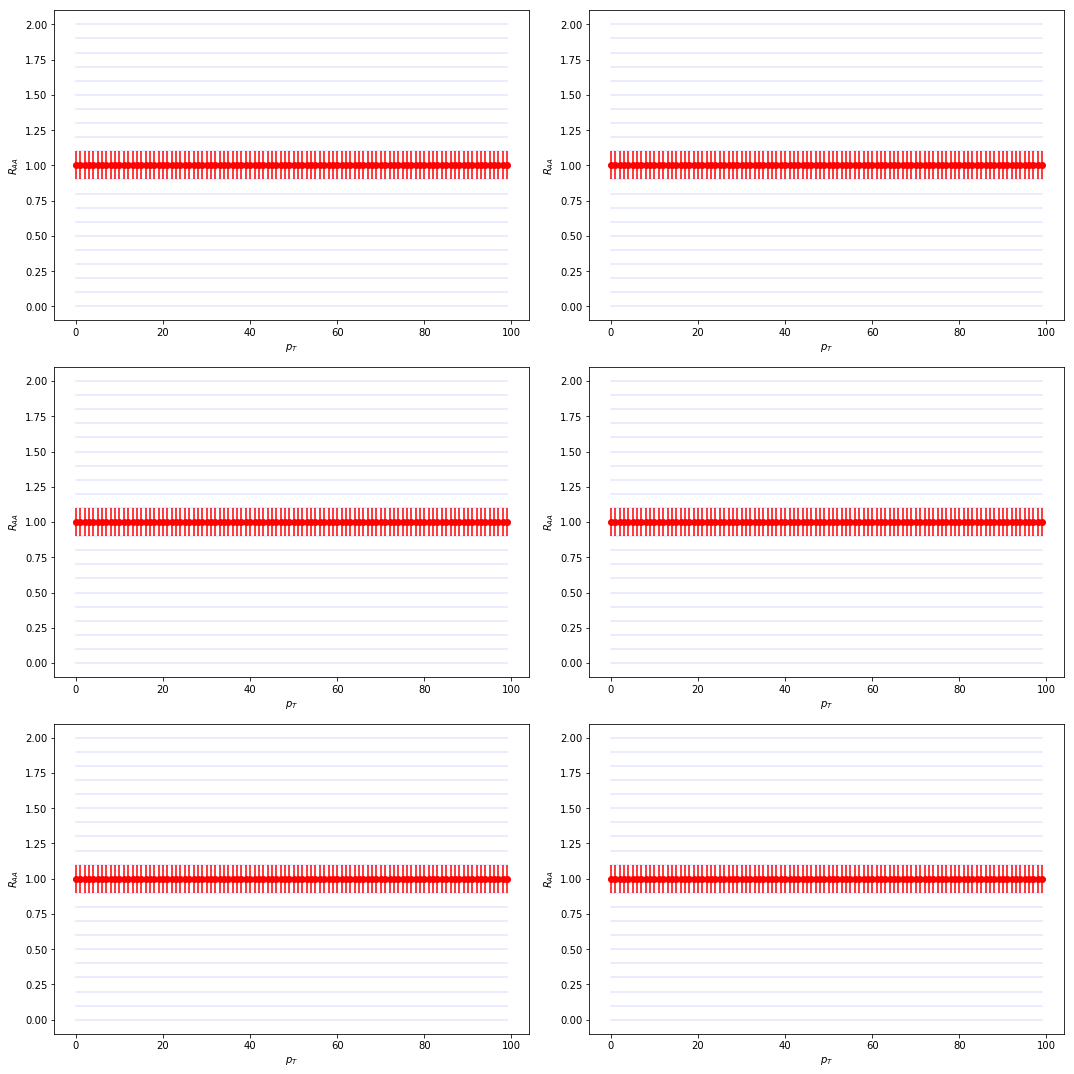

In [12]:
TempPrediction = AllData["model"]

SystemCount = len(AllData["systems"])

figure, axes = plt.subplots(figsize = (15, 5 * SystemCount), ncols = 2, nrows = SystemCount)


for s1 in range(0, SystemCount):
    for s2 in range(0, 2):
        axes[s1][s2].set_xlabel(r"$p_{T}$")
        axes[s1][s2].set_ylabel(r"$R_{AA}$")
        
        S1 = AllData["systems"][s1]
        O  = AllData["observables"][0][0]
        S2 = AllData["observables"][0][1][s2]
        
        DX = AllData["data"][S1][O][S2]['x']
        DY = AllData["data"][S1][O][S2]['y']
        DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
                
        for i, y in enumerate(TempPrediction[S1][O][S2]['Y']):
            axes[s1][s2].plot(DX, y, 'b-', alpha=0.1, label="Posterior" if i==0 else '')
        axes[s1][s2].errorbar(DX, DY, yerr = DE, fmt='ro', label="Measurements")
'''
        
axes.set_xlabel(r"$p_{T}$")
axes.set_ylabel(r"$R_{AA}$")
        
S1 = AllData["systems"][0]
O  = AllData["observables"][0][0]
S2 = AllData["observables"][0][1][0]
        
DX = AllData["data"][S1][O][S2]['x']
DY = AllData["data"][S1][O][S2]['y']
DE = np.sqrt(AllData["data"][S1][O][S2]['yerr']['stat'][:,0]**2 + AllData["data"][S1][O][S2]['yerr']['sys'][:,0]**2)
                
for i, y in enumerate(TempPrediction[S1][O][S2]['Y']):
    axes.plot(DX, y, 'b-', alpha=0.1, label="Posterior" if i==0 else '')
axes.errorbar(DX, DY, yerr = DE, fmt='ro', label="Measurements")
'''
        
plt.tight_layout(True)
figure.savefig('plots/Design.pdf', dpi = 192)
# figure

In [14]:
# close all plots to save memory
plt.close('all')

In [ ]:
# ! python3 -m src.simpleplots

# Scratch space

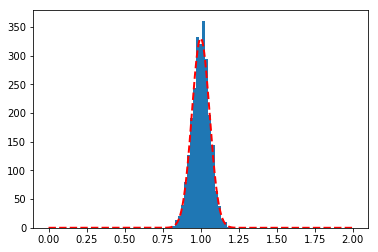

In [13]:
Examples = MCMCSamples[ np.random.choice(range(len(MCMCSamples)), 2500), :]
TempPrediction = {"PbPb5020": EmulatorPbPb5020.predict(Examples)}
plt.hist(TempPrediction["PbPb5020"]["R_AA"]["C0"][:,0], bins = np.linspace(0, 2, 100))
y = stats.norm.pdf(np.linspace(0, 2, 1000), 1, 0.058)
l = plt.plot(np.linspace(0, 2, 1000), y * 48, 'r--', linewidth=2)
plt.savefig('plots/Average.pdf', dpi = 192)

In [ ]:
TempPrediction

In [ ]:
Examples

In [ ]:
EmulatorPbPb5020.predict([[1.06, 0.31]])